# Driver License Classification Project

## Introduction

Obtaining a driver's license is a significant milestone that demands not only theoretical knowledge but also demonstrated on-road competence. The process typically involves multiple assessments, including evaluations of practical driving skills, understanding of road signs, and adherence to safety protocols. However, the complexity and subjectivity involved in the manual assessment of candidates' performance can sometimes lead to inconsistencies or inefficiencies.

The **Driver License Classification** project aims to harness the power of machine learning to assist in the driver licensing process by automating the classification of applicants as "Qualified" or "Not Qualified." This project leverages a rich dataset comprising both demographic information and detailed assessment scores from driving evaluations. By systematically analyzing this data, the system learns patterns and factors that contribute most significantly to an applicant's success or failure.

Through a pipeline that includes data cleaning, exploration, encoding, visualization, and predictive modeling, this project not only improves the accuracy and consistency of license qualification decisions but also offers insights into the key drivers of success in practical driving tests. Ultimately, this solution aspires to streamline the evaluation workflow, enhance road safety, and make the licensing process more objective and transparent.


# Libraries

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn Modules
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import (accuracy_score, precision_score, classification_report)
from sklearn.feature_selection import f_classif

# Other libraries
import time
from IPython.display import clear_output


sns.set()

# Loading the Dataset

In [2]:
df = pd.read_csv("Drivers License Data.csv")
df.head(10)

,Applicant ID,Gender,Age Group,Race,Training,Signals,Yield,Speed Control,Night Drive,Road Signs,Steer Control,Mirror Usage,Confidence,Parking,Theory Test,Reactions,Qualified
0,AID0001,Male,Young Adult,Other,NaN,38.48,30.29,37.03,33.53,39.61,58.16,53.42,35.32,38.19,70.68,Average,No
1,AID0002,Female,Young Adult,Black,NaN,51.76,19.13,63.05,34.87,19.56,16.48,27.97,22.91,24.23,78.18,Average,No
2,AID0003,Male,Middle Age,Black,NaN,30.21,48.13,43.13,42.43,60.93,20.74,28.86,32.32,44.11,79.60,Fast,Yes
3,AID0004,Male,Young Adult,Other,NaN,34.75,47.28,50.49,42.10,22.52,33.87,48.52,24.90,37.56,57.34,Average,No
4,AID0005,Male,Teenager,Other,Advanced,78.52,83.93,59.79,52.68,67.47,89.24,30.31,43.85,55.91,78.44,Average,Yes
5,AID0006,Female,Young Adult,Other,Basic,56.09,59.31,64.18,55.77,60.92,61.85,60.88,60.91,42.64,49.40,Average,Yes
6,AID0007,Male,Middle Age,Black,Basic,62.63,45.75,53.01,31.71,62.35,41.26,44.44,47.03,51.41,78.36,Average,Yes
7,AID0008,Male,Young Adult,Other,Basic,28.47,31.45,58.16,61.68,46.11,50.70,42.56,38.97,31.64,92.37,Average,Yes
8,AID0009,Male,Young Adult,Other,NaN,35.59,41.80,45.71,32.72,10.09,34.31,27.35,36.64,31.94,64.57,Slow,No
9,AID0010,Female,Teenager,White,Advanced,56.62,50.26,35.12,49.42,26.28,57.59,41.20,37.65,50.27,50.17,Average,Yes


# Step 1: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the foundation for understanding any dataset. In this project, EDA uncovers initial patterns, detects anomalies, and provides essential summaries to guide subsequent preprocessing and modeling. The following key subtopics are addressed in this step:

- **Dataset Overview**
  - Use of `df.info()` to inspect data types, non-null counts, and feature list.
- **Descriptive Statistics**
  - Application of `df.describe()` to generate summary statistics for numerical features.
- **Record Count**
  - Determine the total number of applicant records using `df.shape[0]`.
- **Feature Pruning**
  - Removal of the `Applicant ID` column, which is not used for modeling.
- **Missing Value Analysis**
  - Identification and imputation of missing values with methods like `fillna()`.

This structured EDA process ensures a clear understanding of the underlying data and prepares it for effective preprocessing and modeling in subsequent steps.


## 1.1 Dataset Infomation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Applicant ID   500 non-null    object 
 1   Gender         500 non-null    object 
 2   Age Group      500 non-null    object 
 3   Race           500 non-null    object 
 4   Training       350 non-null    object 
 5   Signals        500 non-null    float64
 6   Yield          500 non-null    float64
 7   Speed Control  500 non-null    float64
 8   Night Drive    500 non-null    float64
 9   Road Signs     500 non-null    float64
 10  Steer Control  500 non-null    float64
 11  Mirror Usage   500 non-null    float64
 12  Confidence     500 non-null    float64
 13  Parking        500 non-null    float64
 14  Theory Test    500 non-null    float64
 15  Reactions      500 non-null    object 
 16  Qualified      500 non-null    object 
dtypes: float64(10), object(7)
memory usage: 66.5+ KB


## 1.2 Dataset Description

In [4]:
df.describe(include='all')

,Applicant ID,Gender,Age Group,Race,Training,Signals,Yield,Speed Control,Night Drive,Road Signs,Steer Control,Mirror Usage,Confidence,Parking,Theory Test,Reactions,Qualified
count,500,500,500,500,350,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500,500
unique,500,2,3,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2
top,AID0500,Female,Young Adult,Other,Basic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Average,No
freq,1,256,241,171,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,244,251
mean,NaN,NaN,NaN,NaN,NaN,48.525460,47.784000,47.931740,47.877760,47.793440,47.429480,48.157580,47.654440,48.452360,70.623380,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,16.294927,16.062178,15.601242,15.302693,16.042885,15.580004,15.459866,16.056021,15.705702,17.864177,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.770000,0.000000,0.000000,1.740000,0.000000,0.000000,0.000000,5.120000,0.000000,40.100000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,38.097500,36.915000,37.297500,37.387500,36.547500,37.340000,38.355000,37.020000,37.460000,54.920000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,48.415000,48.950000,49.405000,48.160000,49.310000,48.220000,48.360000,48.255000,49.400000,69.855000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,59.357500,58.977500,58.392500,58.792500,58.772500,57.515000,58.795000,59.027500,59.262500,86.685000,NaN,NaN


## 1.3 Number of records

In [5]:
df.shape[0]

500

## 1.4 Dropping ID Column

In [6]:
df = df.iloc[:,1:]

## 1.5 Checking for Null Values

In [7]:
df.isnull().sum()

Gender             0
Age Group          0
Race               0
Training         150
Signals            0
Yield              0
Speed Control      0
Night Drive        0
Road Signs         0
Steer Control      0
Mirror Usage       0
Confidence         0
Parking            0
Theory Test        0
Reactions          0
Qualified          0
dtype: int64

In [8]:
df['Training'] = df['Training'].fillna('Intermediate')

# Step 2: Data Preprocessing

Data preprocessing is a critical phase that transforms raw data into a format suitable for machine learning algorithms. This step ensures that categorical values are encoded numerically, features are consistent, and the dataset is ready for analysis and modeling. The following subtopics are addressed in this section:

- **Identification of Categorical Features**
  - Detect and list all categorical columns within the dataset.
- **Unique Value Inspection**
  - Review unique values present in each categorical feature to inform encoding strategies.
- **Encoding Categorical Variables**
  - Apply Ordinal Encoding to convert categorical features into numerical values for model compatibility.
- **Final Dataset Preparation**
  - Preview and verify the structure of the dataset after preprocessing is complete.

By systematically handling categorical variables and preparing the data, this step establishes a robust foundation for data visualization and machine learning.


## 2.1 Data Encoding

### 2.1.1 Getting Categorical Column Names

In [9]:
categorical_columns = df.select_dtypes(include='object')
categorical_columns

,Gender,Age Group,Race,Training,Reactions,Qualified
0,Male,Young Adult,Other,Intermediate,Average,No
1,Female,Young Adult,Black,Intermediate,Average,No
2,Male,Middle Age,Black,Intermediate,Fast,Yes
3,Male,Young Adult,Other,Intermediate,Average,No
4,Male,Teenager,Other,Advanced,Average,Yes
...,...,...,...,...,...,...
495,Male,Middle Age,Other,Basic,Average,No
496,Male,Young Adult,White,Basic,Average,No
497,Female,Young Adult,Black,Intermediate,Fast,No
498,Male,Middle Age,Black,Basic,Average,No


### 2.1.2 Unique values in all Categorical Columns

In [10]:
def print_unique(categorical_columns):
    for i, col in enumerate(categorical_columns):
        print(f"{col} has: {df[col].unique()}")
        print("*"*20)

print_unique(categorical_columns)

Gender has: ['Male' 'Female']
********************
Age Group has: ['Young Adult' 'Middle Age' 'Teenager']
********************
Race has: ['Other' 'Black' 'White']
********************
Training has: ['Intermediate' 'Advanced' 'Basic']
********************
Reactions has: ['Average' 'Fast' 'Slow']
********************
Qualified has: ['No' 'Yes']
********************


### 2.1.3 Use of Ordinal Encoder

In [11]:
oe = OrdinalEncoder(categories=[['Male', 'Female']])
df['Gender'] = oe.fit_transform(df[['Gender']])

oe = OrdinalEncoder(categories=[['Teenager', 'Young Adult', 'Middle Age']])
df['Age Group'] = oe.fit_transform(df[['Age Group']])

oe = OrdinalEncoder(categories=[['Black', 'White', 'Other']])
df['Race'] = oe.fit_transform(df[['Race']])

oe = OrdinalEncoder(categories=[['Basic', 'Intermediate', 'Advanced']])
df['Training'] = oe.fit_transform(df[['Training']])

oe = OrdinalEncoder(categories=[['Slow', 'Average', 'Fast']])
df['Reactions'] = oe.fit_transform(df[['Reactions']])

oe = OrdinalEncoder(categories=[['No', 'Yes']])
df['Qualified'] = oe.fit_transform(df[['Qualified']])

## 2.2 Final Dataset after Data Preprocesing

In [12]:
df.head(10)

,Gender,Age Group,Race,Training,Signals,Yield,Speed Control,Night Drive,Road Signs,Steer Control,Mirror Usage,Confidence,Parking,Theory Test,Reactions,Qualified
0,0.0,1.0,2.0,1.0,38.48,30.29,37.03,33.53,39.61,58.16,53.42,35.32,38.19,70.68,1.0,0.0
1,1.0,1.0,0.0,1.0,51.76,19.13,63.05,34.87,19.56,16.48,27.97,22.91,24.23,78.18,1.0,0.0
2,0.0,2.0,0.0,1.0,30.21,48.13,43.13,42.43,60.93,20.74,28.86,32.32,44.11,79.60,2.0,1.0
3,0.0,1.0,2.0,1.0,34.75,47.28,50.49,42.10,22.52,33.87,48.52,24.90,37.56,57.34,1.0,0.0
4,0.0,0.0,2.0,2.0,78.52,83.93,59.79,52.68,67.47,89.24,30.31,43.85,55.91,78.44,1.0,1.0
5,1.0,1.0,2.0,0.0,56.09,59.31,64.18,55.77,60.92,61.85,60.88,60.91,42.64,49.40,1.0,1.0
6,0.0,2.0,0.0,0.0,62.63,45.75,53.01,31.71,62.35,41.26,44.44,47.03,51.41,78.36,1.0,1.0
7,0.0,1.0,2.0,0.0,28.47,31.45,58.16,61.68,46.11,50.70,42.56,38.97,31.64,92.37,1.0,1.0
8,0.0,1.0,2.0,1.0,35.59,41.80,45.71,32.72,10.09,34.31,27.35,36.64,31.94,64.57,0.0,0.0
9,1.0,0.0,1.0,2.0,56.62,50.26,35.12,49.42,26.28,57.59,41.20,37.65,50.27,50.17,1.0,1.0


# Step 3: Data Visualization

Data Visualization plays a vital role in gaining insights into the distribution and relationships within the dataset. This step helps in identifying patterns, trends, and correlations that inform feature selection and model building. The key subtopics covered in this section include:

- **Feature Distribution Plots**
  - Visualize the distribution of all features segmented by the target variable (*Qualified*) to understand class-wise differences.
- **Correlation Heatmap**
  - Generate a heatmap to examine relationships between features and their correlation with the target variable, highlighting important predictors.

Through effective visualization techniques, this step enhances interpretability and guides the modeling process by uncovering meaningful data characteristics.


## 3.1 All Feature Distribution Plot based on pre-labelled data

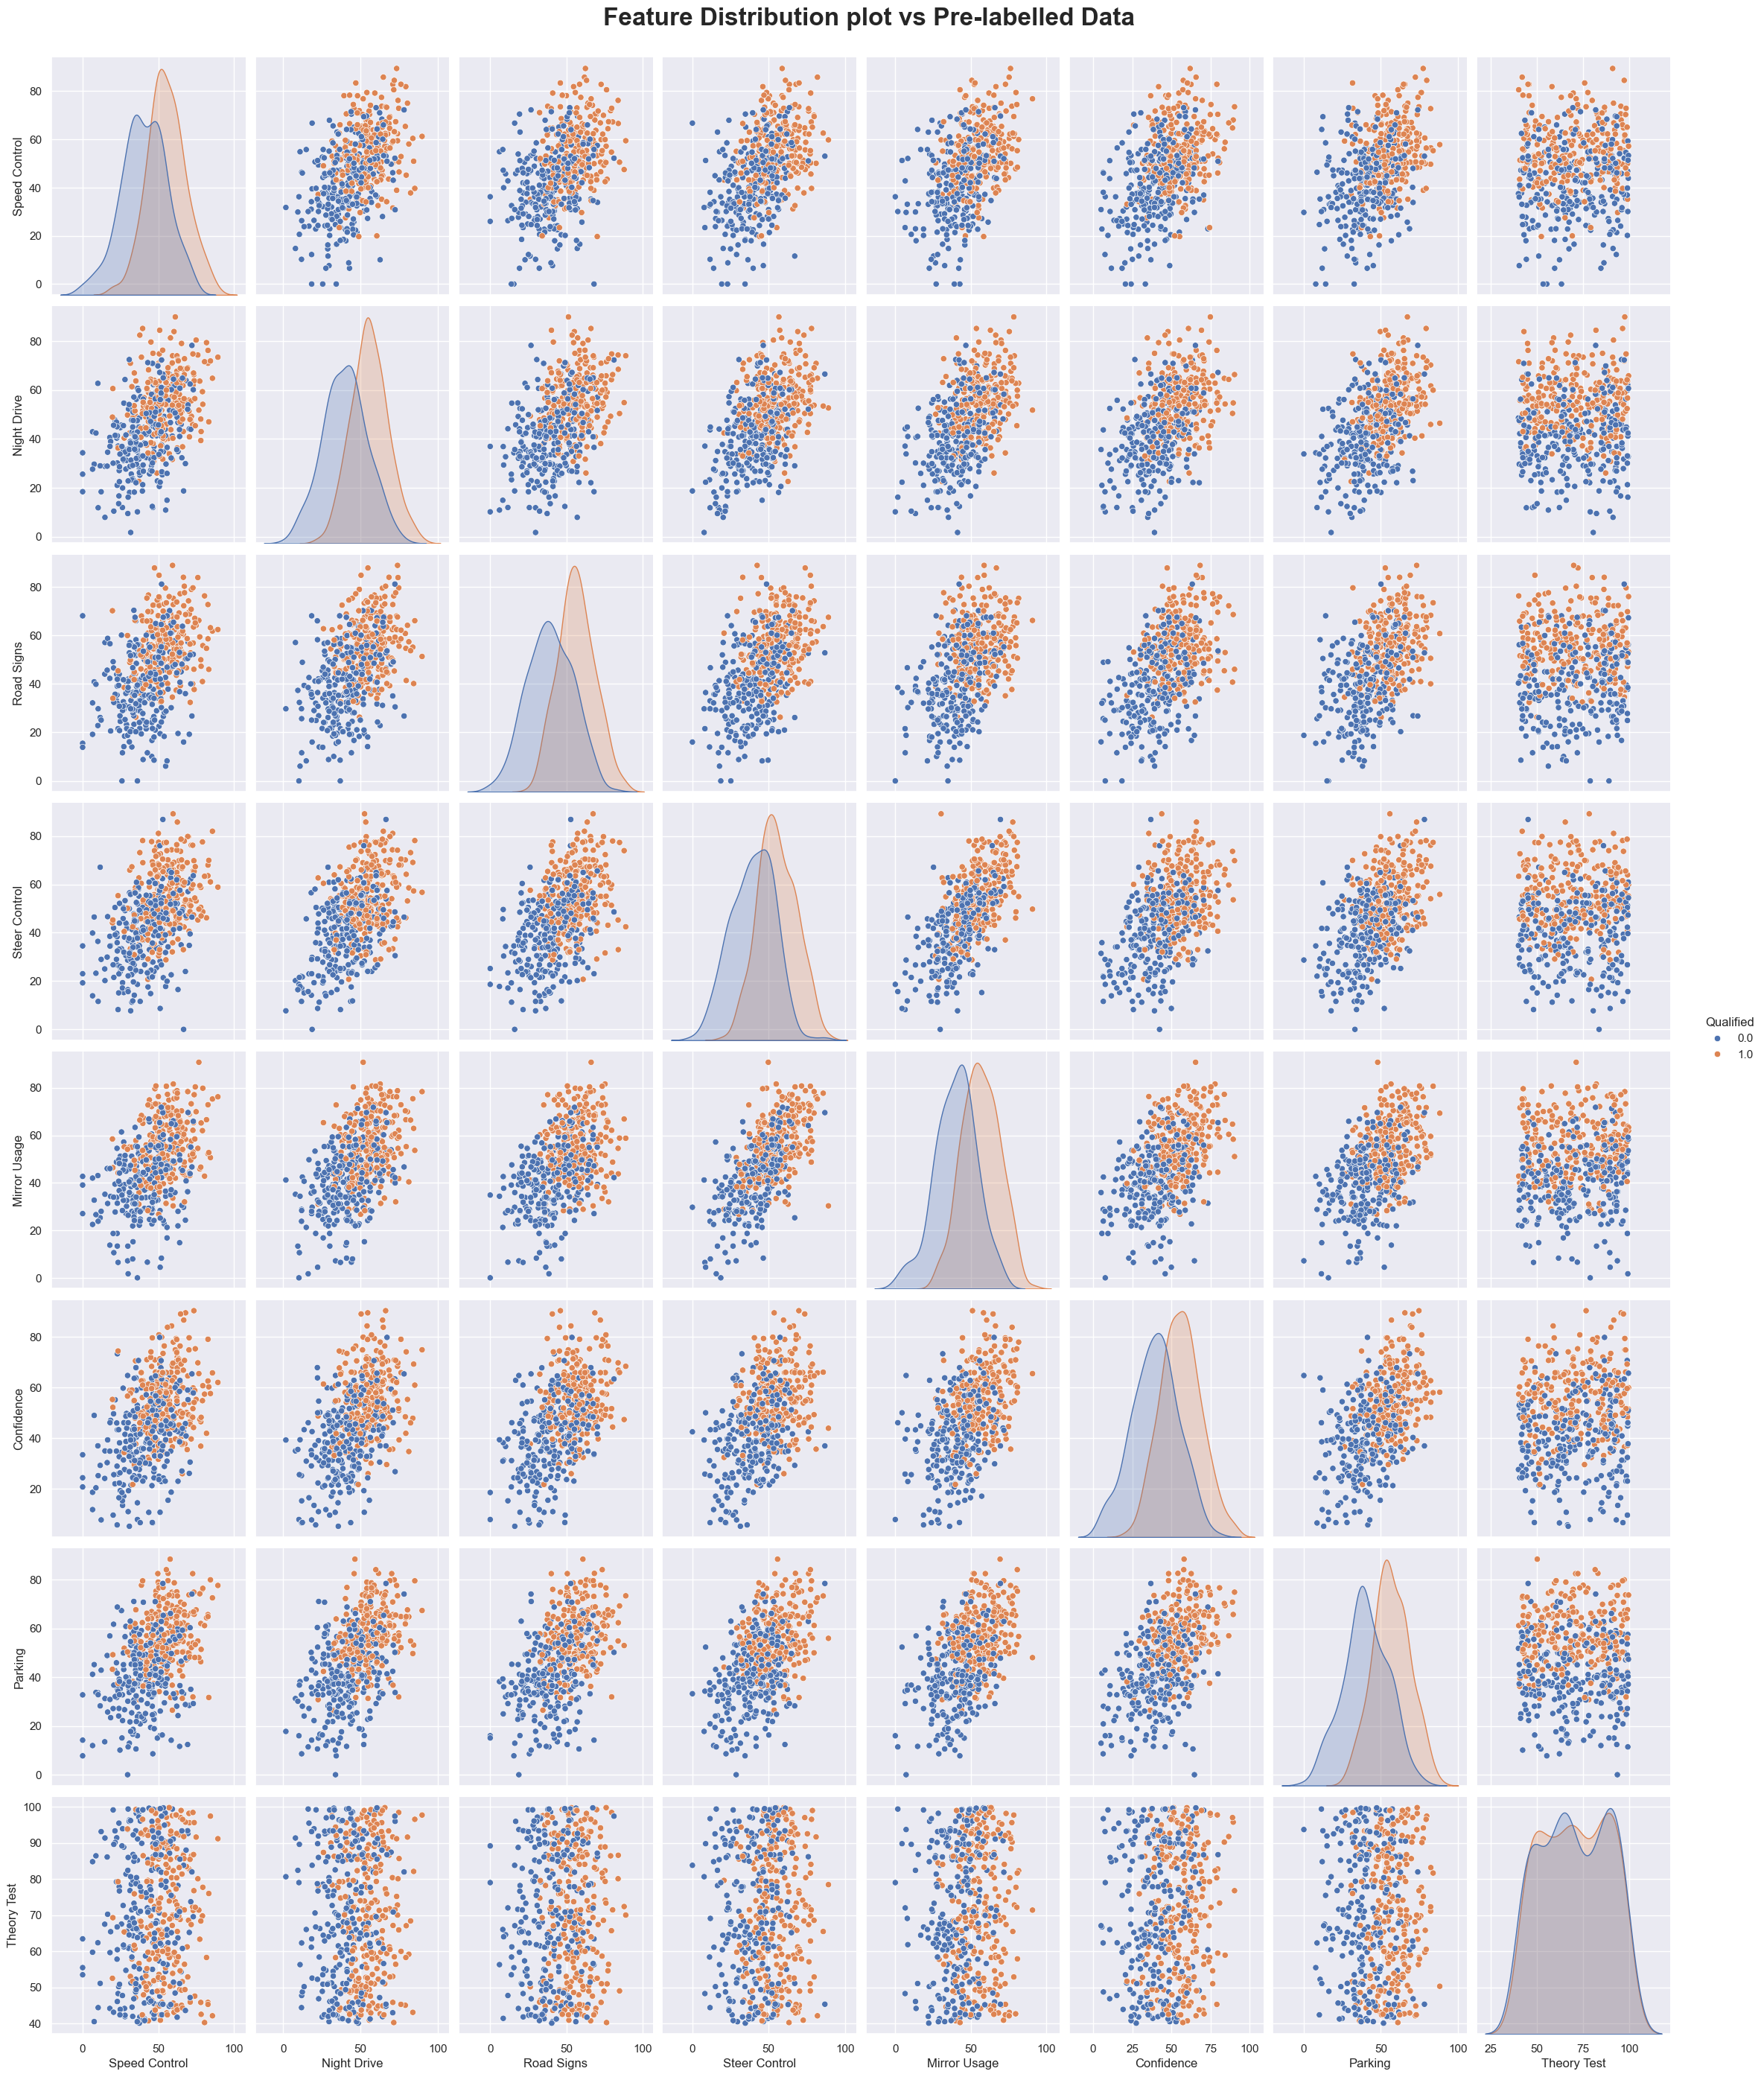

In [13]:
plot = sns.pairplot(df.iloc[:,6:].drop(columns='Reactions'), hue='Qualified')
plot.fig.set_size_inches(24, 28)
plot.fig.suptitle("Feature Distribution plot vs Pre-labelled Data", fontsize=24, y=1.01, fontweight='bold')
plt.savefig('Feature Distribution plot vs Pre-labelled Data', bbox_inches='tight')
plt.show()

## 3.2 Correlation Heatmap between all features vs target variable

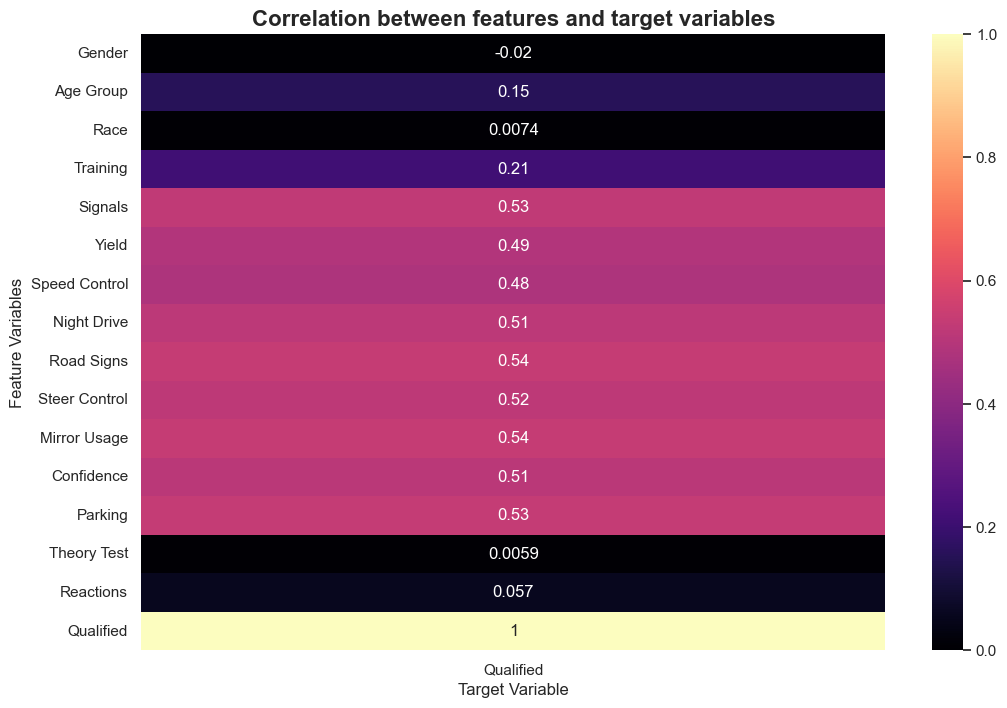

In [14]:
corr_df = pd.DataFrame(data = df.corr())
plt.figure(figsize = (12, 8))
sns.heatmap(corr_df.iloc[:,-1:], annot=True, cmap='magma', vmax=1, vmin=0)
plt.title("Correlation between features and target variables", fontsize=16, fontweight='bold')
plt.xlabel('Target Variable')
plt.ylabel('Feature Variables')
plt.savefig("Correlation between features and target variables", bbox_inches='tight')
plt.show()

# Step 4: Model Building 

Model Building marks the transition from data exploration and preparation to predictive analytics. This step involves constructing, tuning, and evaluating machine learning models to classify driver license applicants effectively. The following subtopics are covered in this stage:

- **Feature Selection and Scaling**
  - Choose appropriate predictor features and apply standardization to ensure uniform scale for all input variables.
- **KMeans Clustering**
  - Implement KMeans algorithm, utilizing the Elbow Method to identify the optimal number of clusters for grouping applicants.
- **Prediction and Label Assignment**
  - Generate cluster labels and interpret them in the context of license qualification.
- **Model Evaluation**
  - Assess model performance using evaluation metrics such as accuracy, confusion matrix, and classification report.
- **Feature Importance Analysis**
  - Examine the influence of each feature on model predictions to highlight critical factors in driver qualification.

This stage translates data insights into actionable predictions, laying the groundwork for building an automated and objective driver license classification system.


## 4.1 Getting Features for prediction

In [15]:
X = df.iloc[:,:-1]

## 4.2 Feature Scaling

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.02429504, -0.09772305,  1.20476695, ..., -0.65407058,
         0.00317265, -0.14690438],
       [ 0.97628121, -0.09772305, -1.2389794 , ..., -1.54380992,
         0.42342772, -0.14690438],
       [-1.02429504,  1.29832058, -1.2389794 , ..., -0.27675992,
         0.50299602,  1.26563772],
       ...,
       [ 0.97628121, -0.09772305, -1.2389794 , ..., -0.70951995,
         0.86721709,  1.26563772],
       [-1.02429504,  1.29832058, -1.2389794 , ..., -0.75987053,
         0.832476  , -0.14690438],
       [ 0.97628121, -0.09772305, -1.2389794 , ...,  0.35039159,
         0.36122997, -0.14690438]])

## 4.3 Model Creation

### 4.3.1 Elbow method for KMeans Clsutering

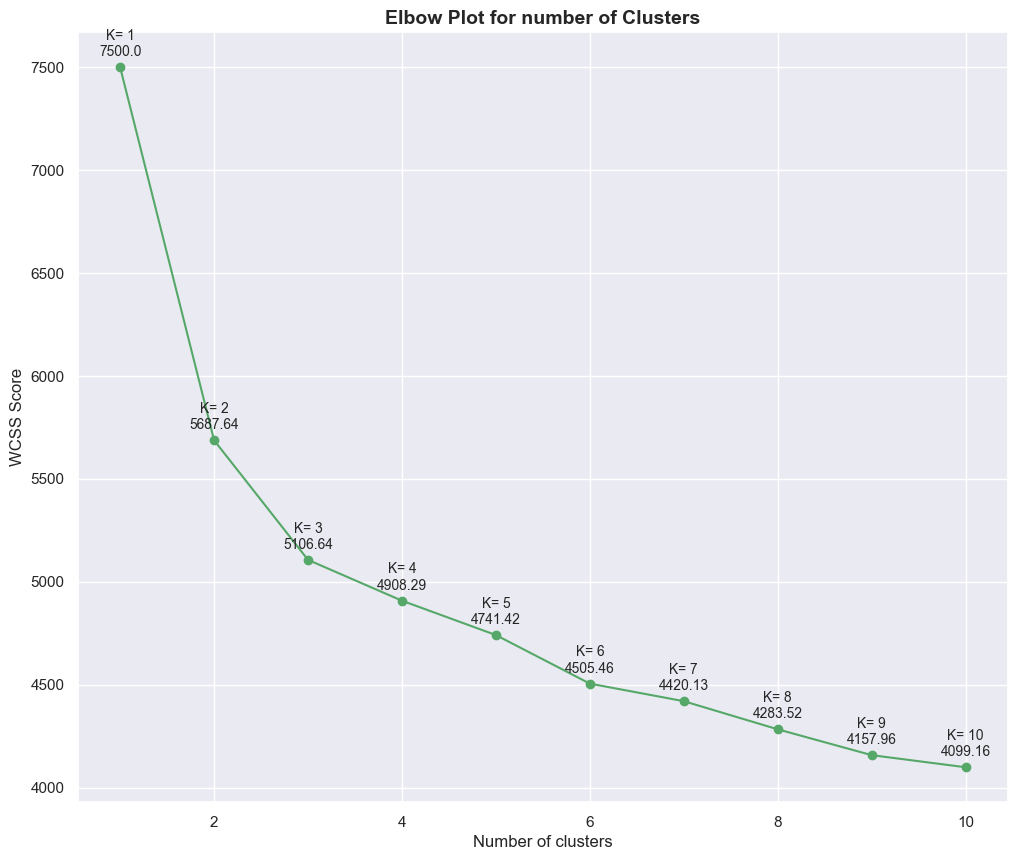

In [17]:
wcss = []
k = range(1, 11)
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=25)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 10))
plt.plot(k, wcss, 'go-')
for i, val in enumerate(wcss):
    plt.annotate(f"K= {i+1}\n{round(val, 2)}", (k[i], wcss[i]), textcoords='offset points', xytext = (0, 8), ha='center', fontsize=10)

plt.title("Elbow Plot for number of Clusters", fontsize=14, fontweight='bold')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS Score")
plt.savefig('KMeans Elbow Plot', bbox_inches="tight")
plt.show()

### 4.3.2 Predicting the labels (Using KMeans)

In [18]:
kmeans = KMeans(n_clusters=2, random_state=25)
pred_kmeans = kmeans.fit_predict(X_scaled)

### 4.3.3 Evaluation Scores (*Since pre-labels are available*) 

In [19]:
def evaluation_metrices(y, y_pred):
    print(f"Accuracy: {accuracy_score(y, y_pred)*100:.2f}%")
    print("*" * 40)
    print(f"Accuracy: {precision_score(y, y_pred)*100:.2f}")
    print("*" * 40)
    print(f"Accuracy: {classification_report(y, y_pred)}")

evaluation_metrices(df['Qualified'], pred_kmeans)

Accuracy: 81.60%
****************************************
Accuracy: 78.75
****************************************
Accuracy:               precision    recall  f1-score   support

         0.0       0.85      0.77      0.81       251
         1.0       0.79      0.86      0.82       249

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



### 4.3.4 Checking Feature Importance

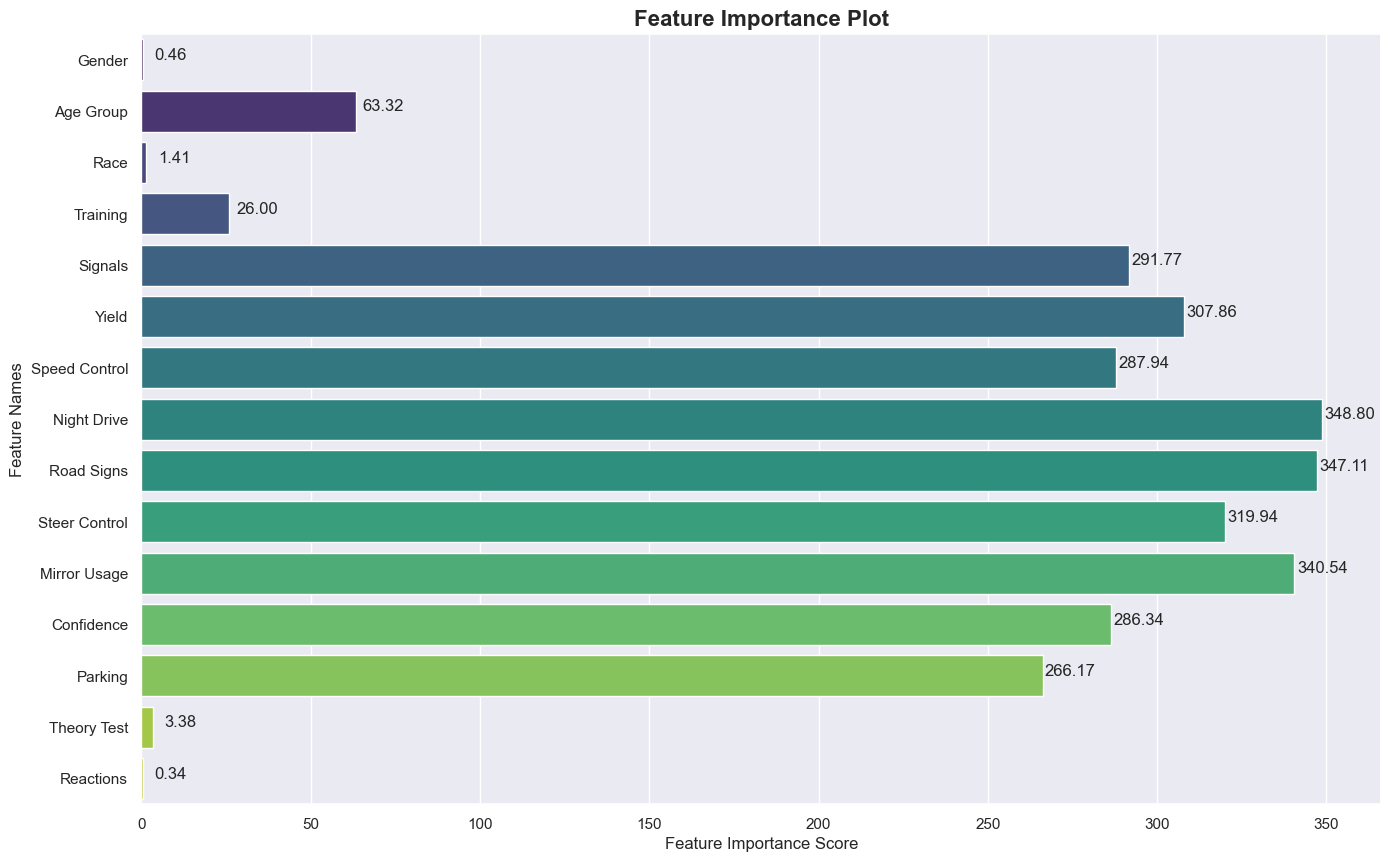

In [20]:
F_Value, P_Value = f_classif(X, pred_kmeans)
plt.figure(figsize = (16,10))
sns.barplot(y=X.columns, x=F_Value, hue=X.columns, palette="viridis")

for i, f in enumerate(F_Value):
    plt.annotate(text=f"{f:.2f}", xy=(f, i), xytext=(20, 0), textcoords="offset points", ha='center')

plt.title("Feature Importance Plot", fontsize=16, fontweight='bold')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Names")
plt.savefig("Feature Importance", bbox_inches='tight')
plt.show()

# Step 5: Predicting on new Data

The final phase of the project applies the trained model to real-world scenarios, enabling predictions on new driver license applications. This step operationalizes the analytics pipeline and demonstrates the model's practical value. The following subtopics are included:

- **User Input Functionality**
  - Implement a mechanism (such as a user_input function or interface) to gather new applicant information for prediction.
- **Data Preprocessing on New Inputs**
  - Apply the same preprocessing and encoding steps to new data as those performed on the original dataset.
- **Prediction Generation**
  - Use the trained machine learning model to predict whether the new applicant is *Qualified* or *Not Qualified* for a driver's license.
- **Result Display**
  - Clearly present the prediction outcome to the user, ensuring transparency and actionable feedback.

This section bridges the gap between analysis and application, allowing stakeholders to benefit from automated, data-driven driver license qualification assessments.


In [21]:
def predict_label(new_data):
    new_x_scaled = scaler.transform(new_data)
    label = kmeans.predict(new_x_scaled)
    clear_output(wait=True)
    print("✅ You are Qualified for license" if label[0] == 1 else "❌ Sorry... you are not Qualified for license")
    
def user_input():
    gender = float(input("Enter Applicant's Gender (Male -> 0, Female -> 1): "))
    ageGroup = float(input("Enter Applicant's  Age group (Teenager -> 0, Young Adult -> 1, Middle Age -> 2): "))
    race = float(input("Enter Applicant's  Race (Black -> 0, White -> 1, Other -> 2): "))
    training = float(input("Enter Applicant's  previous training level (Basic -> 0, Intermediate -> 1, Advance -> 2): "))
    signals = float(input("Enter Applicant's assessment score of proper signalling, lane changes, etc: "))
    yields = float(input("Enter Applicant's assessment score of right of way to other vehicles and pedestrians "))
    speedControl = float(input("Enter Applicant's measure of ability to maintain appropriate speed: "))
    nightDrive = float(input("Enter Applicant's performance score out of 100 in simulated or actual night driving conditions: "))
    roadSigns = float(input("Enter Applicant's score on applicant's knowledge indicating familiarity and correct interpretation of road signs: "))
    steerControl = float(input("Enter Applicant's score of the applicant's ability to control the vehicle under normal and stressful conditions: "))
    mirrorUsage = float(input("Enter Applicant's score on proper and consistent use of mirrors during various manoeuvres: "))
    confidence = float(input("Enter Applicant's score on how confidently the applicant handled driving tasks: "))
    parking = float(input("Enter Applicant's score for parallel, angle, and perpendicular parking tasks: "))
    theoryTest = float(input("Enter Applicant's score out of 100 on the in-car theoretical assessment covering traffic laws, road signs, and general driving theory: "))
    reactions = float(input("Enter Applicant's levels indicating applicants' response to driving scenarios(Slow -> 0, Average -> 1, Fast -> 2): "))

    new_data = np.array([gender, ageGroup, race, training, signals, yields, speedControl, nightDrive, roadSigns, steerControl, mirrorUsage, confidence, parking, theoryTest, reactions])

    predict_label(new_data.reshape(1,-1))

user_input()

✅ You are Qualified for license


# Conclusion

The **Driver License Classification** project successfully demonstrates the application of machine learning techniques to streamline and enhance the driver licensing evaluation process. By systematically analyzing a comprehensive dataset containing demographic and performance assessment features, the project provides a robust framework to classify applicants as *Qualified* or *Not Qualified* with improved accuracy and consistency.

Key accomplishments include:

- Effective handling of data through exploratory analysis, preprocessing, and visualization to uncover meaningful patterns.
- Implementation of KMeans clustering to model applicant grouping, supported by thorough evaluation and feature importance analysis.
- Development of a user-friendly prediction interface enabling practical, real-time qualification assessment for new applicants.

This project not only contributes to automating and objectifying the licensing decision-making process but also highlights important factors influencing driver competence. Ultimately, it offers a valuable tool for licensing authorities aiming to improve safety and fairness on the roads through data-driven insights and automation.
